<a href="https://colab.research.google.com/github/welting82/AIclass/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [21]:
trans = ["airplane",								
  "automobile",							
  "bird",								
  "cat",							
  "deer",								
  "dog",							
  "frog",								
  "horse",									
  "ship",									
  "truck",
  ]

truck


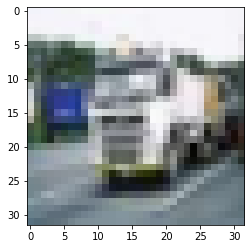

In [22]:
import matplotlib.pyplot as plt
idx = 1000
plt.imshow(x_train[idx])
print(trans[y_train[idx][0]])

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
layers = [
      # 1 filter(3 * 3 * 3) * 64 + 64(bias) = 1792
      Conv2D(64, 3, padding="same", activation="relu", input_shape=(32,32,3)),
      MaxPooling2D(),
      # 1 filter(3 * 3 * 64) * 128 + 128(bias) = 73856
      Conv2D(128, 3, padding="same", activation="relu"),
      MaxPooling2D(),
      Conv2D(256, 3, padding="same", activation="relu"),
      MaxPooling2D(),
      Flatten(),
      Dense(256, activation="relu"),
      Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 256)       

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
layers = [
      # 1 filter(3 * 3 * 3) * 64 + 64(bias) = 1792
      Conv2D(64, 3, padding="same", activation="relu", input_shape=(32,32,3)),
      MaxPooling2D(),
      # 1 filter(3 * 3 * 64) * 128 + 128(bias) = 73856
      Conv2D(128, 3, padding="same", activation="relu"),
      MaxPooling2D(),
      Conv2D(256, 3, padding="same", activation="relu"),
      MaxPooling2D(),
      Conv2D(512, 3, padding="same", activation="relu"),
      GlobalAveragePooling2D(),
      Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 256)       

In [25]:
# Sparse: 只存不是0的地方->不用做one-hot encoding
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [26]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cifar.h5", save_best_only=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=100,
     epochs=100,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

Epoch 1/100
450/450 - 20s - loss: 1.6407 - accuracy: 0.3921 - val_loss: 1.3513 - val_accuracy: 0.4904 - 20s/epoch - 45ms/step
Epoch 2/100
450/450 - 10s - loss: 1.2064 - accuracy: 0.5658 - val_loss: 1.0588 - val_accuracy: 0.6144 - 10s/epoch - 22ms/step
Epoch 3/100
450/450 - 10s - loss: 0.9938 - accuracy: 0.6455 - val_loss: 0.9248 - val_accuracy: 0.6672 - 10s/epoch - 22ms/step
Epoch 4/100
450/450 - 10s - loss: 0.8453 - accuracy: 0.6999 - val_loss: 0.8367 - val_accuracy: 0.7044 - 10s/epoch - 22ms/step
Epoch 5/100
450/450 - 10s - loss: 0.7467 - accuracy: 0.7380 - val_loss: 0.7824 - val_accuracy: 0.7334 - 10s/epoch - 23ms/step
Epoch 6/100
450/450 - 10s - loss: 0.6645 - accuracy: 0.7685 - val_loss: 0.7507 - val_accuracy: 0.7418 - 10s/epoch - 22ms/step
Epoch 7/100
450/450 - 10s - loss: 0.5855 - accuracy: 0.7941 - val_loss: 0.6682 - val_accuracy: 0.7758 - 10s/epoch - 23ms/step
Epoch 8/100
450/450 - 11s - loss: 0.5203 - accuracy: 0.8170 - val_loss: 0.6820 - val_accuracy: 0.7664 - 11s/epoch - 24

In [29]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.6685 - accuracy: 0.7745


[0.668534517288208, 0.7745000123977661]

In [ ]:
pre = model.predict(x_test_norm).argmax(axis=1)
pre

In [ ]:
# the same: y_test.reshape(-1)
y_test_reshape = y_test.reshape(10000)
y_test_reshape

In [ ]:
# tensorflow: one-hot sklearn: original
import pandas as pd
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      index=["{}(True)".format(trans[i]) for i in range(10)],
      columns=["{}(Pred)".format(trans[i]) for i in range(10)])

In [ ]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
idx = np.nonzero(y_test_reshape != pre)[0]
idx = idx[:200]
pre_false_label = y_test_reshape[idx]
pre_false_pre = pre[idx]
pre_false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[pre_false_label[i]], trans[pre_false_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])

In [36]:
import requests
import numpy as np
# Pillow
from PIL import Image
url = input("url:")
response = requests.get(url, stream=True)
img = Image.open(response.raw).resize((32, 32)).convert("RGB")
img_pre = np.array(img).reshape(1, 32, 32, 3)
proba = model.predict(img_pre)[0]
for i in range(10):
    print(trans[i], ":", round(proba[i], 5))
plt.imshow(img)

url:https://tnimage.s3.hicloud.net.tw/photos/2019/12/20/1576828719-5dfc7f2f96d3e.jpg
airplane : 0.0
automobile : 0.0
bird : 0.0
cat : 0.0
deer : 0.0
dog : 1.0
frog : 0.0
horse : 0.0
ship : 0.0
truck : 0.0
